<a href="https://colab.research.google.com/github/Divyasharma18/Project3_EDA/blob/main/Project03_nexthikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

dataset_1=pd.read_csv('/content/drive/MyDrive/housing_data.csv')#load first dataset in CSV format
dataset_1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [6]:
dataset_1.shape

(1460, 81)

In [7]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##now filling the null values

In [8]:
##Now as we can see the nonnull values in the data, take the columns filled with less than total number of rows and fill the missing values
nuldatacolumns = dataset_1[['MasVnrType', 'Alley', 'GarageYrBlt', 'Electrical']]
nuldatacolumns.isnull().sum()

MasVnrType      872
Alley          1369
GarageYrBlt      81
Electrical        1
dtype: int64

In [9]:

nuldatacolumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrType   588 non-null    object 
 1   Alley        91 non-null     object 
 2   GarageYrBlt  1379 non-null   float64
 3   Electrical   1459 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.8+ KB


As we saw, only one column "Alley" has a significant amount of null values. a narrow passage between buildings or other structures.In that case, the absence of Alley represents no information loss.henece will remove the column

In [10]:
##now i will drop Alley as it has high number of missing values
nuldatacolumns= nuldatacolumns.drop(['Alley'],axis=1)
nuldatacolumns= nuldatacolumns.drop(['MasVnrType'],axis=1)

In [11]:
nuldatacolumns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
 1   Electrical   1459 non-null   object 
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


now will fill the object datat by mode and intiger datata by mean value

In [12]:
nuldatacolumns['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [13]:
nuldatacolumns['Electrical'].fillna(nuldatacolumns['Electrical'].mode()[0], inplace = True)

In [14]:
nuldatacolumns['Electrical'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [15]:
nuldatacolumns['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [16]:
nuldatacolumns.isnull().sum()

GarageYrBlt    81
Electrical      0
dtype: int64

In [17]:
nuldatacolumns = nuldatacolumns.fillna(nuldatacolumns['GarageYrBlt'].mean())
print(nuldatacolumns)

      GarageYrBlt Electrical
0          2003.0      SBrkr
1          1976.0      SBrkr
2          2001.0      SBrkr
3          1998.0      SBrkr
4          2000.0      SBrkr
...           ...        ...
1455       1999.0      SBrkr
1456       1978.0      SBrkr
1457       1941.0      SBrkr
1458       1950.0      FuseA
1459       1965.0      SBrkr

[1460 rows x 2 columns]


In [18]:
##check if there is a null value
nuldatacolumns.isnull().sum()

GarageYrBlt    0
Electrical     0
dtype: int64

In [19]:
dataset_1.update(nuldatacolumns[['GarageYrBlt', 'Electrical']])
dataset_1

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [20]:

dataset_1=dataset_1.drop(['Alley'],axis=1)
dataset_1=dataset_1.drop(['MasVnrType'],axis=1)
dataset_1=dataset_1.drop(['Unnamed: 0'],axis=1)

In [21]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [22]:
numerical_list = []
categorical_list = []

for col in dataset_1.columns:
  if dataset_1[col].dtype == "object":
    {
    categorical_list.append(col)
    }
  else:
    {
      numerical_list.append(col)

    }


In [23]:
print(numerical_list)
print(categorical_list)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'P

In [24]:
categorical_list

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [25]:
dataset_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [26]:
print(dataset_1['SaleType'].unique())

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


In [27]:
#to check the unique value counts
dataset_1['SaleType'].value_counts()



SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [28]:
##to check the value counts for all categorial cloumns
for i in categorical_list:
  print(dataset_1[i].value_counts())


MSSubClass
SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     

In [29]:
#now we will check HouseStyle data with respect to sale condition in street
dataset_1.groupby(['HouseStyle','SaleCondition','Street']).agg({'SalePrice': 'mean'})






SalePrice
HouseStyle SaleCondition Street               
1.5Fin     Abnorml       Pave    111506.857143
           AdjLand       Pave    103500.000000
           Family        Pave    130000.000000
           Normal        Grvl    228950.000000
                         Pave    146663.671642
1.5Unf     Normal        Pave    110150.000000
1Story     Abnorml       Pave    137579.634615
           AdjLand       Pave     82000.000000
           Alloca        Grvl     55993.000000
                         Pave    141383.400000
           Family        Pave    156416.666667
           Normal        Grvl    125900.000000
                         Pave    168073.486063
           Partial       Pave    269711.858974
2.5Fin     Abnorml       Pave    152000.000000
           Normal        Pave    242666.666667
2.5Unf     Normal        Pave    157354.545455
2Story     Abnorml       Pave    190237.043478
           Alloca        Pave    251026.500000
           Family        Pave    138750.000000
           Normal        Pave    203193.475676
           Partial       Pave    279542.260870
SFoyer     Abnorml       Pave    114750.000000
           AdjLand       Pave    127500.000000
           Alloca        Pave    156198.666667
           Family        Pave    170000.000000
           Normal        Grvl    118500.000000
                         Pave    133702.142857
           Partial       Pave    140000.000000
SLvl       Abnorml       Pave    146875.000000
           Alloca        Pave    274970.000000
           Normal        Pave    167602.678571

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

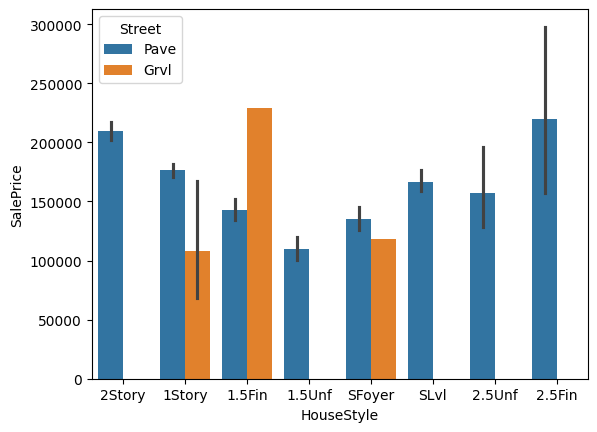

In [30]:
sns.barplot(x='HouseStyle', y='SalePrice', hue='Street', data=dataset_1)


##Observation:
1. most purchased house style is 2.5fin HouseStyle
2. most purchased street is Paved


<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

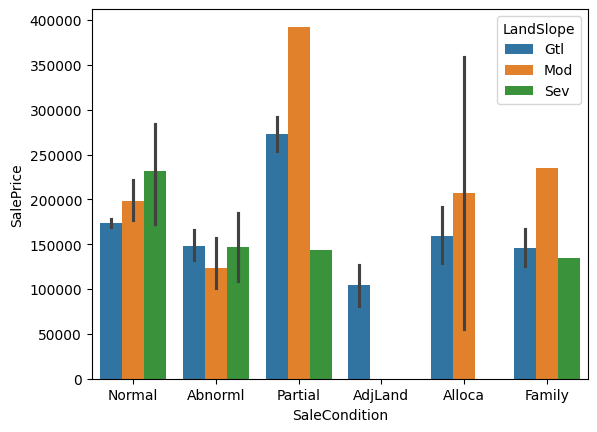

In [31]:
sns.barplot(x='SaleCondition', y='SalePrice', hue='LandSlope', data=dataset_1)


#Observation:
1. sales condition is high for Moderate Slope

Observation: 1. Pave street area is most purchased
              3.

<Axes: ylabel='count'>

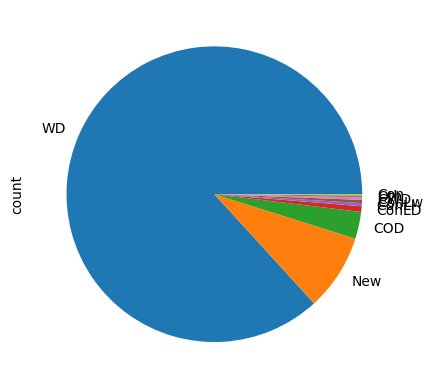

In [34]:
##plot the pie chart for the qnique values
dataset_1['SaleType'].value_counts().plot(kind = 'pie')

<Axes: ylabel='count'>

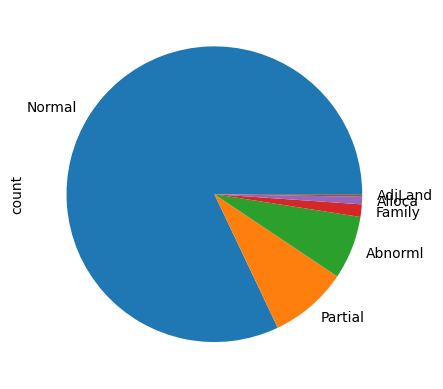

In [35]:
##plot the pie chart for the qnique values on column SaleCondition
dataset_1['SaleCondition'].value_counts().plot(kind = 'pie')


In [37]:
#check the data shape
df_encoded.shape


(1460, 80)

##EDA

##Univariant Analysis

<ipython-input-38-cc20589059cd>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0, 0.5, 'Counts')

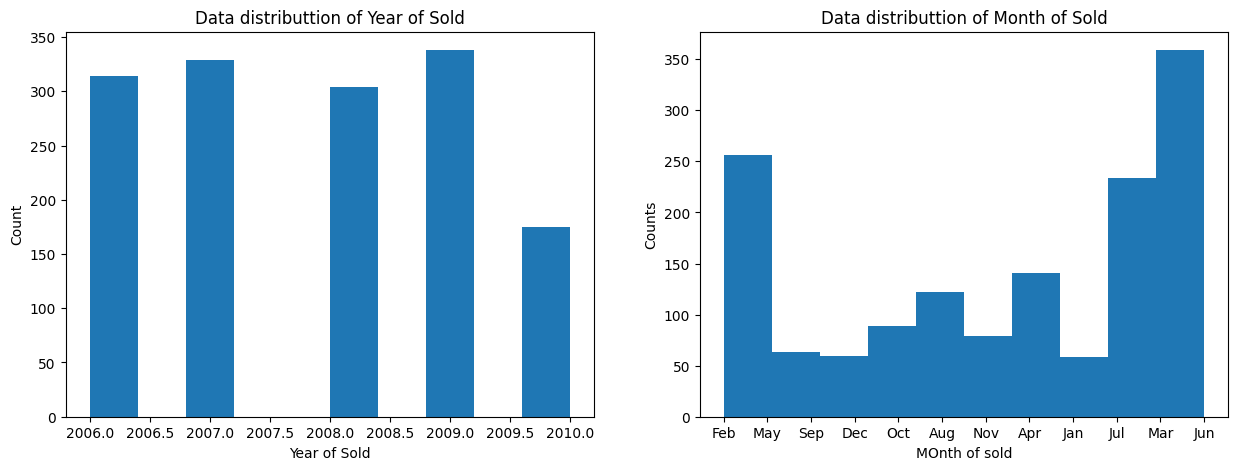

In [38]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
dataset_1['YrSold']
plt.hist(dataset_1['YrSold'])
plt.title('Data distributtion of Year of Sold')
plt.xlabel('Year of Sold')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(dataset_1['MoSold'])
plt.title('Data distributtion of Month of Sold')
plt.xlabel('MOnth of sold')
plt.ylabel('Counts')

<ipython-input-39-b0342f090b81>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


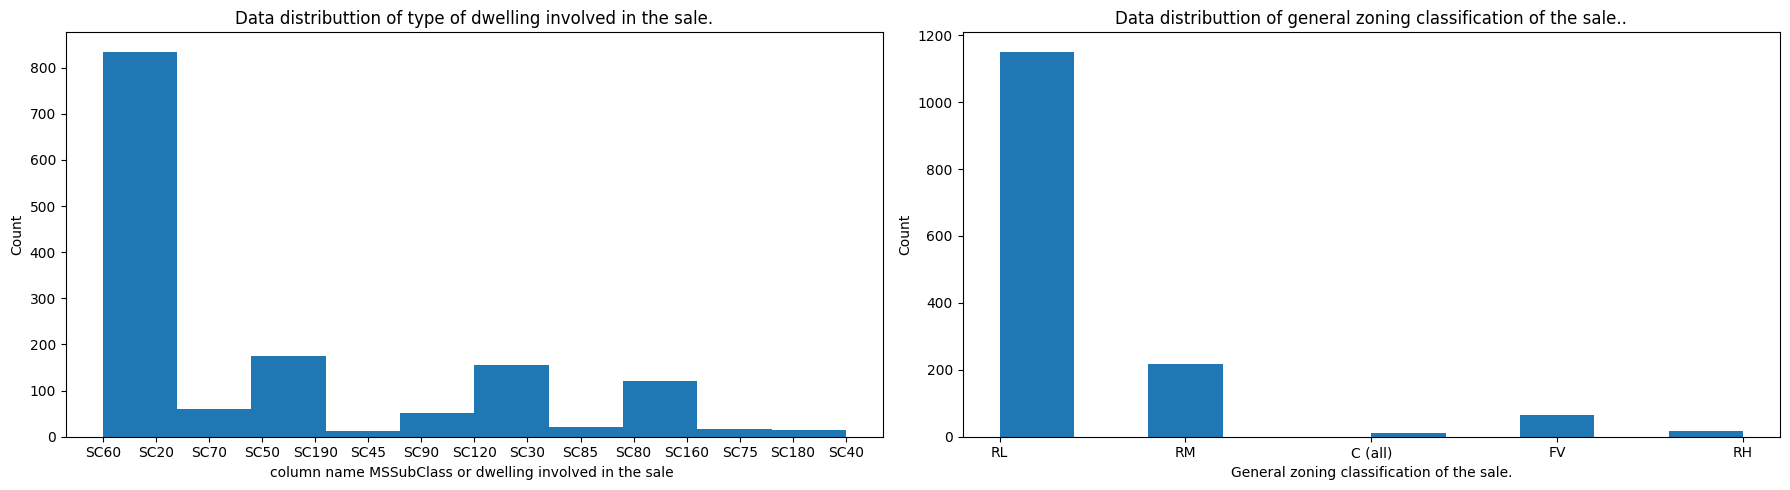

In [39]:

plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
dataset_1['MSSubClass']
plt.hist(dataset_1['MSSubClass'])
plt.title('Data distributtion of type of dwelling involved in the sale.')
plt.xlabel('column name MSSubClass or dwelling involved in the sale ')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.hist(dataset_1['MSZoning'])
plt.title('Data distributtion of general zoning classification of the sale..')
plt.xlabel('General zoning classification of the sale.')
plt.ylabel('Count')
plt.tight_layout()

<ipython-input-40-8e1dee0ddb1e>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


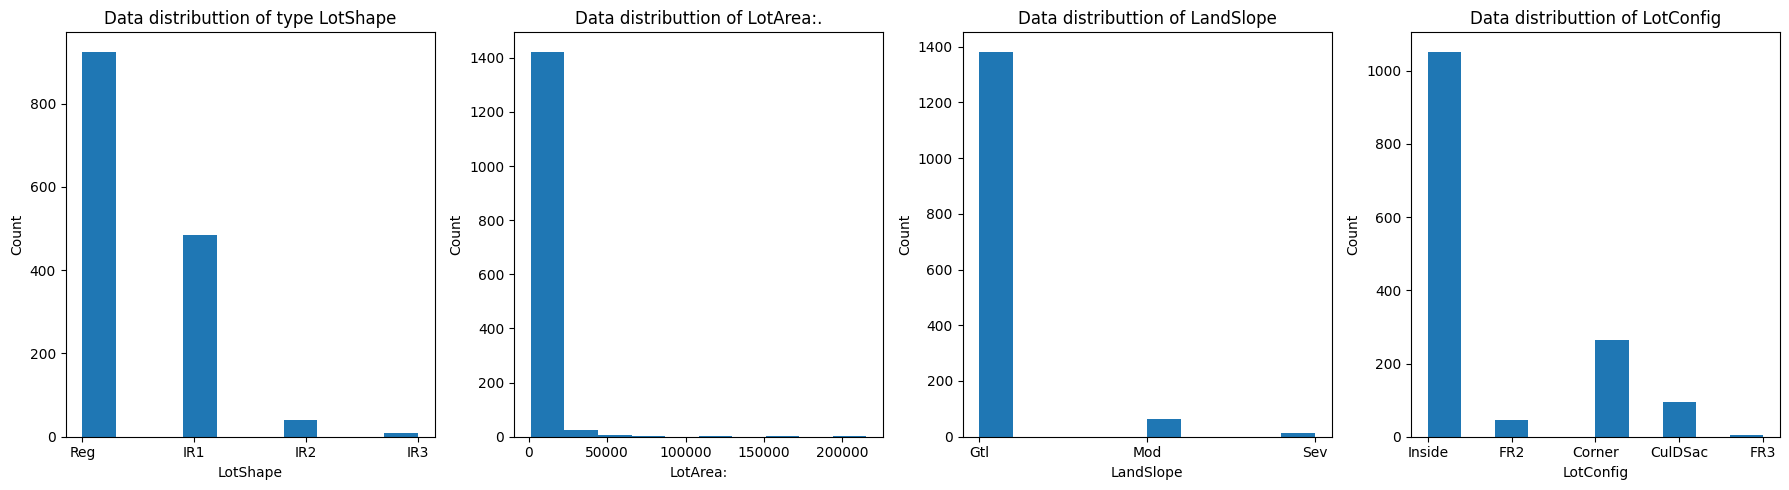

In [40]:
plt.subplots(figsize=(18, 5))
plt.subplot(1, 4, 1)
dataset_1['LotShape']
plt.hist(dataset_1['LotShape'])
plt.title('Data distributtion of type LotShape')
plt.xlabel('LotShape')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 2)
plt.hist(dataset_1['LotArea'])
plt.title('Data distributtion of LotArea:.')
plt.xlabel('LotArea:')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 3)
plt.hist(dataset_1['LandSlope'])
plt.title('Data distributtion of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 4, 4)
plt.hist(dataset_1['LotConfig'])
plt.title('Data distributtion of LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('Count')
plt.tight_layout()


<ipython-input-41-73b0fb1b3d41>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


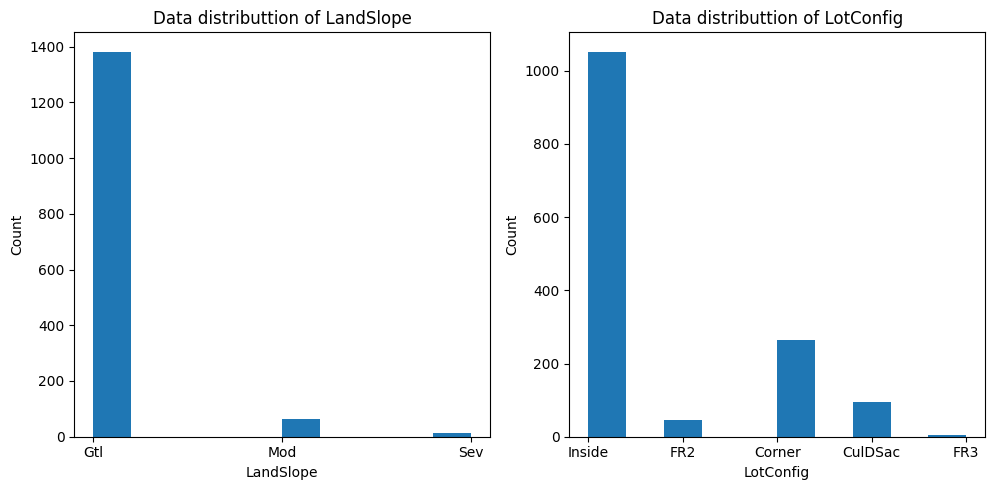

In [41]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(dataset_1['LandSlope'])
plt.title('Data distributtion of LandSlope')
plt.xlabel('LandSlope')
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(1, 3, 2)
plt.hist(dataset_1['LotConfig'])
plt.title('Data distributtion of LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('Count')
plt.tight_layout()

In [42]:
dataset_1['Neighborhood'].unique()


array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<ipython-input-43-af7dc20e90e5>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


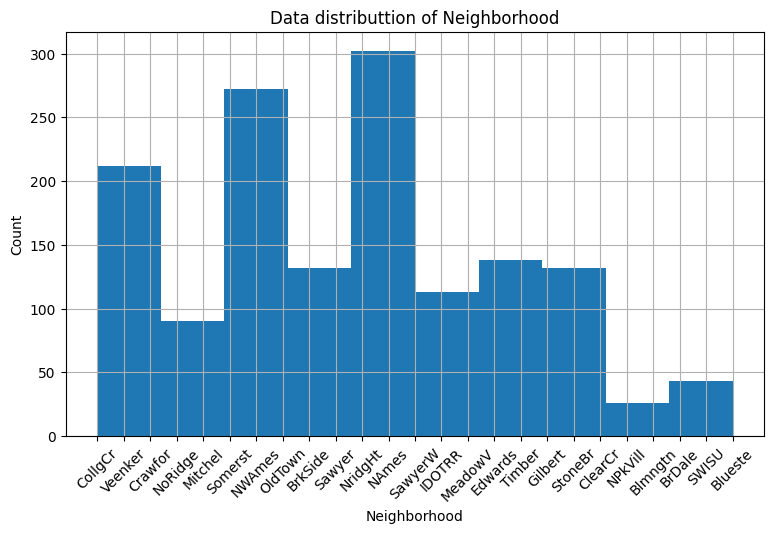

In [43]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.hist(dataset_1['Neighborhood'])
plt.title('Data distributtion of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()

plt.grid();
plt.xticks(rotation = 45)
plt.show()

In [44]:
dataset_1['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [45]:
dataset_1['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

#Bivariant analysis


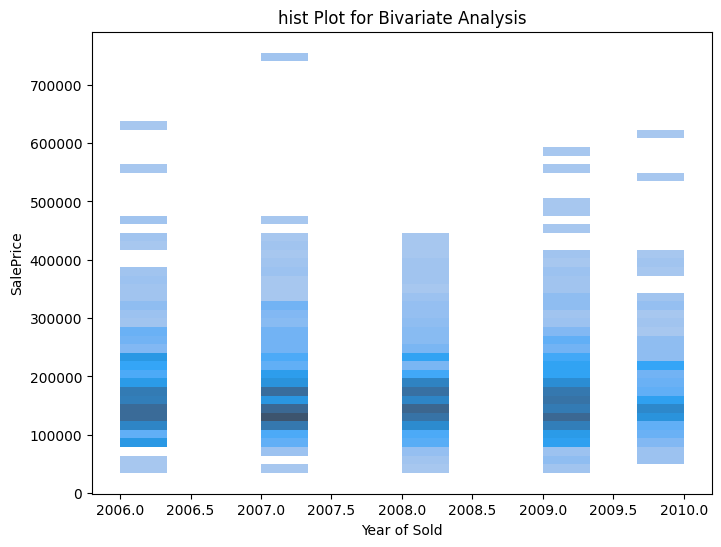

In [46]:
##year of sold V/s Saleprice

dataset_1= pd.DataFrame(dataset_1)

# Create joint plot
#sns.jointplot(data=dataset_1, x='YrSold', y='SalePrice', kind='scatter')
#plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset_1, x='YrSold', y='SalePrice')
plt.title('hist Plot for Bivariate Analysis')
plt.xlabel('Year of Sold')
plt.ylabel('SalePrice')
plt.show()

<ipython-input-47-0172eb331708>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


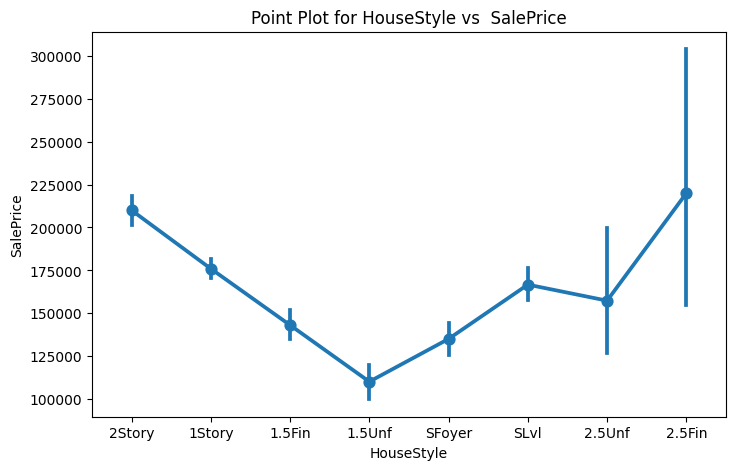

<Figure size 640x480 with 0 Axes>

In [47]:
##house style VS Saleprice
plt.subplots(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.pointplot(data=dataset_1, x='HouseStyle', y='SalePrice')
plt.title('Point Plot for HouseStyle vs  SalePrice')
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
plt.show()
plt.tight_layout()


In [48]:
dataset_1.groupby(['LotFrontage','LotArea','LotShape']).agg({'SalePrice': 'mean'})

SalePrice
LotFrontage LotArea LotShape               
0           1974    Reg        83500.000000
            2117    Reg       174333.333333
            2651    Reg       165000.000000
            2665    Reg       115000.000000
            2887    Reg       173000.000000
...                                     ...
174         15138   IR1       403000.000000
            25419   Reg       235000.000000
182         14572   IR3       259000.000000
313         27650   IR2       242000.000000
            63887   IR3       160000.000000

[1190 rows x 1 columns]

<Figure size 10000x2000 with 0 Axes>

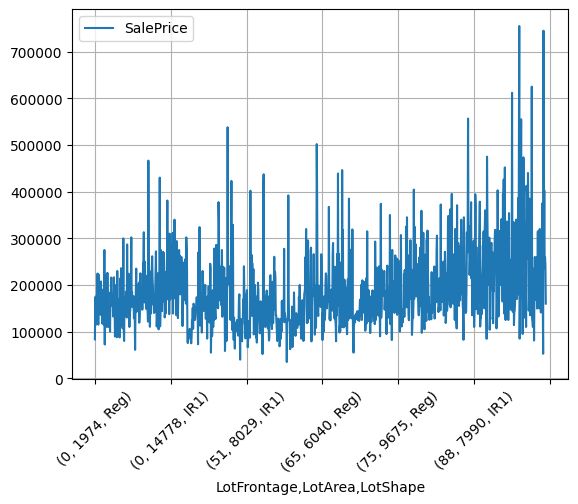

In [49]:
plt.figure(figsize = [100,20])
dataset_1.groupby(['LotFrontage','LotArea','LotShape']).agg({'SalePrice': 'mean'}).plot()

plt.grid();
plt.xticks(rotation = 45)
plt.show();

Observation:-
1. sales price are good for the category (88, 7990 and IR1)

In [50]:
##Data_lotgroup=dataset_1.groupby(['LotFrontage','LotArea'])
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='LotFrontage', y='LotArea', z='LotShape', template= "plotly_dark", color="SalePrice")
ax.show()

##Observation:-
1. most of the data distributted in 0 to 50K lot area

In [51]:
dataset_1.groupby(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']).agg({'SalePrice': 'mean'})



SalePrice
GarageType GarageYrBlt GarageFinish GarageCars GarageArea GarageQual GarageCond               
2Types     1920.000000 Unf          3          779        Fa         Fa           87000.000000
           1949.000000 Unf          3          871        TA         TA          145000.000000
           1963.000000 RFn          3          995        TA         TA          186700.000000
           1975.000000 Fin          4          1356       TA         TA          168000.000000
           1989.000000 Unf          3          766        TA         TA          171000.000000
...                                                                                        ...
Detchd     2006.000000 Unf          2          576        TA         TA          158000.000000
           2007.000000 Unf          2          540        TA         TA          146000.000000
           2008.000000 Unf          1          300        Ex         Ex          127500.000000
           2009.000000 RFn          2          528        TA         TA          169116.500000
No         1978.506164 No           0          0          No         No          103317.283951

[1282 rows x 1 columns]

<Figure size 10000x2000 with 0 Axes>

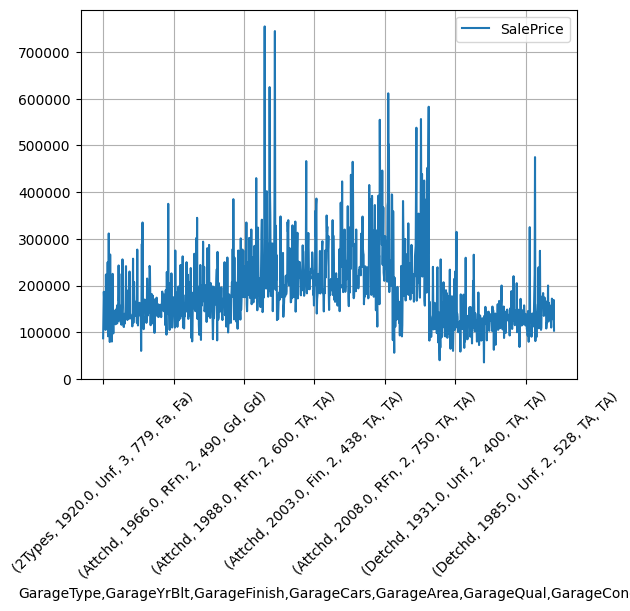

In [52]:
plt.figure(figsize = [100,20])
dataset_1.groupby(['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']).agg({'SalePrice': 'mean'}).plot()
plt.grid();
plt.xticks(rotation = 45)
plt.show();

In [53]:
dataset_1['GarageYrBlt'].unique()

array([2003.        , 1976.        , 2001.        , 1998.        ,
       2000.        , 1993.        , 2004.        , 1973.        ,
       1931.        , 1939.        , 1965.        , 2005.        ,
       1962.        , 2006.        , 1960.        , 1991.        ,
       1970.        , 1967.        , 1958.        , 1930.        ,
       2002.        , 1968.        , 2007.        , 2008.        ,
       1957.        , 1920.        , 1966.        , 1959.        ,
       1995.        , 1954.        , 1953.        , 1978.50616389,
       1983.        , 1977.        , 1997.        , 1985.        ,
       1963.        , 1981.        , 1964.        , 1999.        ,
       1935.        , 1990.        , 1945.        , 1987.        ,
       1989.        , 1915.        , 1956.        , 1948.        ,
       1974.        , 2009.        , 1950.        , 1961.        ,
       1921.        , 1900.        , 1979.        , 1951.        ,
       1969.        , 1936.        , 1975.        , 1971.     

In [54]:
dataset_1['GarageYrBlt'].max()

2010.0

In [55]:
dataset_1['SalePrice'].max()

755000

In [56]:
##Data_lotgroup=dataset_1.groupby(['LotFrontage','LotArea'])
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='YrSold', y='MoSold', z='SaleType', template= "plotly_dark", color="SalePrice")
ax.show()

#Observation:-
1. Most of Sale type under year and month are in **Warranty Deed - Conventional And  New - 	Home just constructed and sold** category

In [57]:
import plotly.express as px
ax = px.scatter_3d(dataset_1, x='YrSold', y='MoSold', z='SaleType', template= "plotly_dark",)
ax.show()

##Now we will Describe the dataset and remove outliers

In [58]:

dataset_1.describe()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [61]:
##YrSold vs SaleCondition and MoSold
##dataset_1.groupby(by = ['YrSold','MoSold'])['SaleCondition'].mean()
pd.DataFrame(dataset_1.groupby(by = ['YrSold','MoSold'])['SalePrice'].mean().sort_values(ascending=False).head(10))

SalePrice
YrSold MoSold               
2006   Sep     223768.866667
2007   Oct     215428.812500
       Dec     214414.500000
2006   Nov     213285.000000
2008   Nov     210981.058824
2010   Mar     203181.285714
2006   Jan     201090.000000
2009   Jul     197984.409836
2007   Nov     197709.333333
2009   Sep     196849.350000

<Axes: ylabel='YrSold,MoSold,LotConfig'>

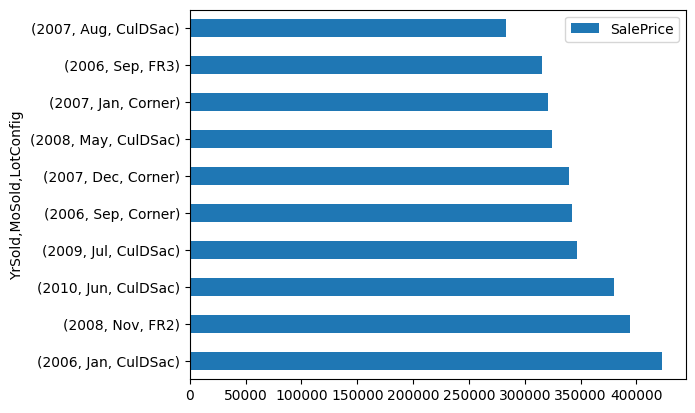

In [62]:
pd.DataFrame(dataset_1.groupby(by = ['YrSold','MoSold','LotConfig',])['SalePrice'].mean().sort_values(ascending=False).head(10)).plot(kind="barh")

##observation :-
1. **Cul-de-sac ** is the most choice and high price data in lot configuration


In [66]:
##toc heck dulicate values in LotConfig
dataset_1['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [67]:
## to check dupliacte values in all cetegorical cloumns
for i in categorical_list:
  print(dataset_1[i].value_counts())

MSSubClass
SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     

In [68]:
##now check the graph of KitchenQual and saleprice
dataset_1.groupby(['KitchenQual','SaleCondition']).agg({'SalePrice': 'mean'})

SalePrice
KitchenQual SaleCondition               
Ex          Abnorml        228857.142857
            Normal         319523.509091
            Partial        359991.421053
Fa          Abnorml        142500.000000
            AdjLand         82000.000000
            Alloca          55993.000000
            Family         135000.000000
            Normal         104677.941176
Gd          Abnorml        191332.344828
            Alloca         274970.000000
            Family         197250.000000
            Normal         208600.653191
            Partial        240632.187500
TA          Abnorml        116881.761905
            AdjLand        111500.000000
            Alloca         167756.600000
            Family         128730.769231
            Normal         141967.306729
            Partial        158031.428571

<Axes: xlabel='KitchenQual', ylabel='SalePrice'>

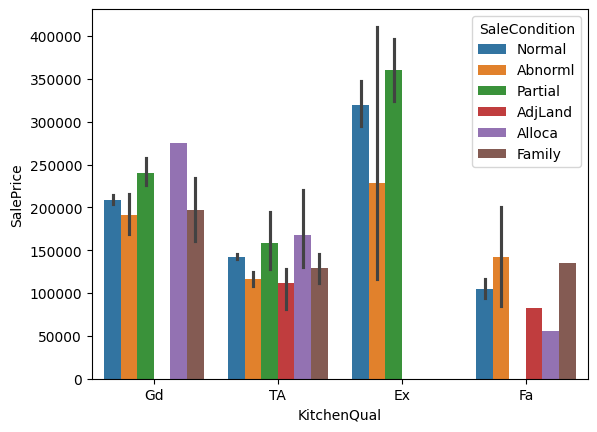

In [69]:
#now plot the graph of KitchenQual and saleprice
sns.barplot(x='KitchenQual', y='SalePrice', hue='SaleCondition', data=dataset_1)

In [73]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [75]:
#convert CentralAir data unto ecoded form by one hot encoding
df_encoded = pd.get_dummies(dataset_1, columns=['CentralAir', 'Street'])
df_encoded

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_N,CentralAir_Y,Street_Grvl,Street_Pave
0,SC60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,Feb,2008,WD,Normal,208500,False,True,False,True
1,SC20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,May,2007,WD,Normal,181500,False,True,False,True
2,SC60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,Sep,2008,WD,Normal,223500,False,True,False,True
3,SC70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,Feb,2006,WD,Abnorml,140000,False,True,False,True
4,SC60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,Dec,2008,WD,Normal,250000,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,Aug,2007,WD,Normal,175000,False,True,False,True
1456,SC20,RL,85,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,Feb,2010,WD,Normal,210000,False,True,False,True
1457,SC70,RL,66,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,2500,May,2010,WD,Normal,266500,False,True,False,True
1458,SC20,RL,68,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,Apr,2010,WD,Normal,142125,False,True,False,True


In [77]:
#check the info fo datat sheet
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [80]:
##saperate the categorical column list
numerical_list = []
categorical_list = []

for col in df_encoded.columns:
  if df_encoded[col].dtype == "object":
    categorical_list.append(col)

  else:
      numerical_list.append(col)

In [81]:


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for categorical_col in categorical_list:
    df_encoded[categorical_col] = encoder.fit_transform(df_encoded[categorical_col])

In [82]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  HouseStyle     1460 non-null   int64  
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [85]:

##conver bool data into int
df_encoded['CentralAir_N'] = df_encoded['CentralAir_N'].astype(int)
df_encoded['CentralAir_Y'] = df_encoded['CentralAir_Y'].astype(int)
df_encoded['Street_Pave'] = df_encoded['Street_Pave'].astype(int)
df_encoded['Street_Grvl'] = df_encoded['Street_Grvl'].astype(int)

In [86]:
#check data
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  HouseStyle     1460 non-null   int64  
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl